In [1]:
# -*- coding: utf-8 -*-
%matplotlib inline

#必要なライブラリを import 
from sklearn import datasets
import numpy as np

# アヤメデータセットを用いる
iris = datasets.load_iris()

# 例として、3,4番目の特徴量の2次元データで使用
X = iris.data[:, [2,3]]
#クラスラベルを取得
y = iris.target

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 

# トレーニングデータとテストデータに分割。
# 今回は訓練データを70%、テストデータは30%としている。
# 乱数を制御するパラメータ random_state は None にすると毎回異なるデータを生成する
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=None )

# データの標準化処理
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [3]:
from sklearn.svm import SVC
# 線形SVMのインスタンスを生成
model = SVC(kernel='linear', random_state=None)

# モデルの学習。fit関数で行う。
model.fit(X_train_std, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [4]:
from sklearn.metrics import accuracy_score

# トレーニングデータに対する精度
pred_train = model.predict(X_train_std)
accuracy_train = accuracy_score(y_train, pred_train)
print('トレーニングデータに対する正解率： %.2f' % accuracy_train)

トレーニングデータに対する正解率： 0.95


In [5]:
# テストデータに対する精度
pred_test = model.predict(X_test_std)
accuracy_test = accuracy_score(y_test, pred_test)
print('テストデータに対する正解率： %.2f' % accuracy_test)

テストデータに対する正解率： 0.98


[1 1 2 2 0 2 2 2 1 1 1 1 1 2 2 1 1 2 0 0 2 0 2 1 0 1 2 2 0 1 0 0 2 2 2 2 0
 1 0 2 0 1 2 2 0 0 0 1 2 2 0 0 2 0 0 0 0 1 1 2 1 1 0 1 0 0 2 1 0 0 1 1 1 2
 0 1 0 2 0 2 0 0 1 1 1 2 2 0 1 0 2 0 0 2 1 2 2 0 2 0 2 2 1 1 1 1 0 1 1 2 2
 0 2 0 0 0 1 1 2 2 1 0 2 1 1 1 0 1 1 1 0 0 1 0 1 0 1 2 1 2 1 2 2 2 0 0 2 0
 2 2]


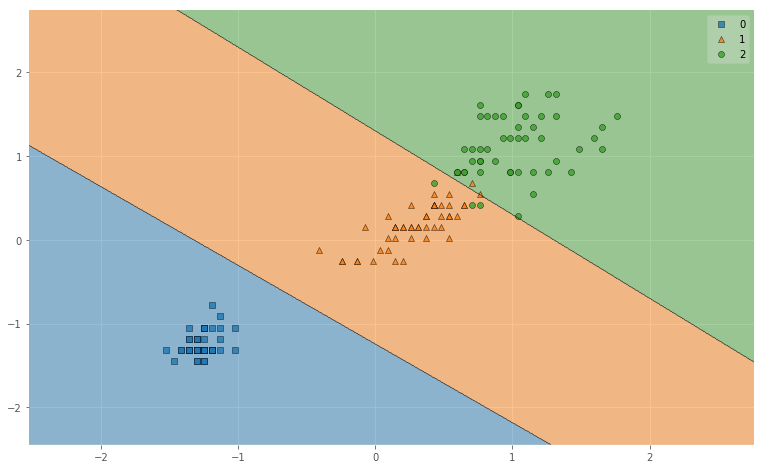

In [12]:
#分類結果を図示する
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
plt.style.use('ggplot') 

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

print(y_combined)

fig = plt.figure(figsize=(13,8))
plot_decision_regions(X_combined_std, y_combined, clf=model,  res=0.02)
plt.show()